# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

Traceback (most recent call last):
  File "C:\Users\tuttoaposto\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\tuttoaposto\AppData\Roaming\Python\Python36\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


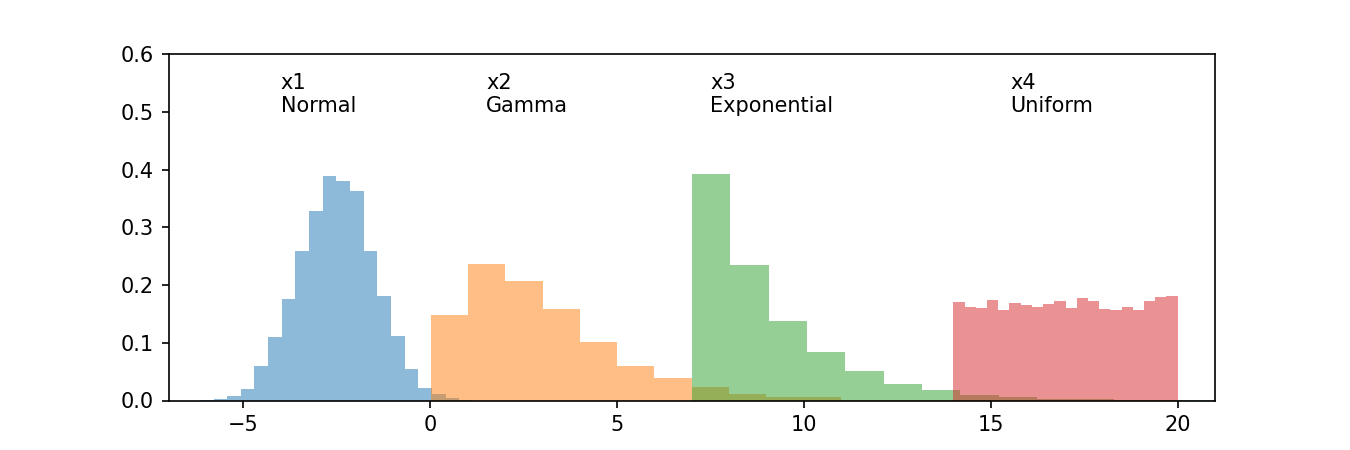

Text(15.51940944601196, 0.5, 'x4\nUniform')

In [37]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

## <font color=Green> First Animation Attempt -- Sampling from Normal Distribution </font>

<IPython.core.display.Javascript object>


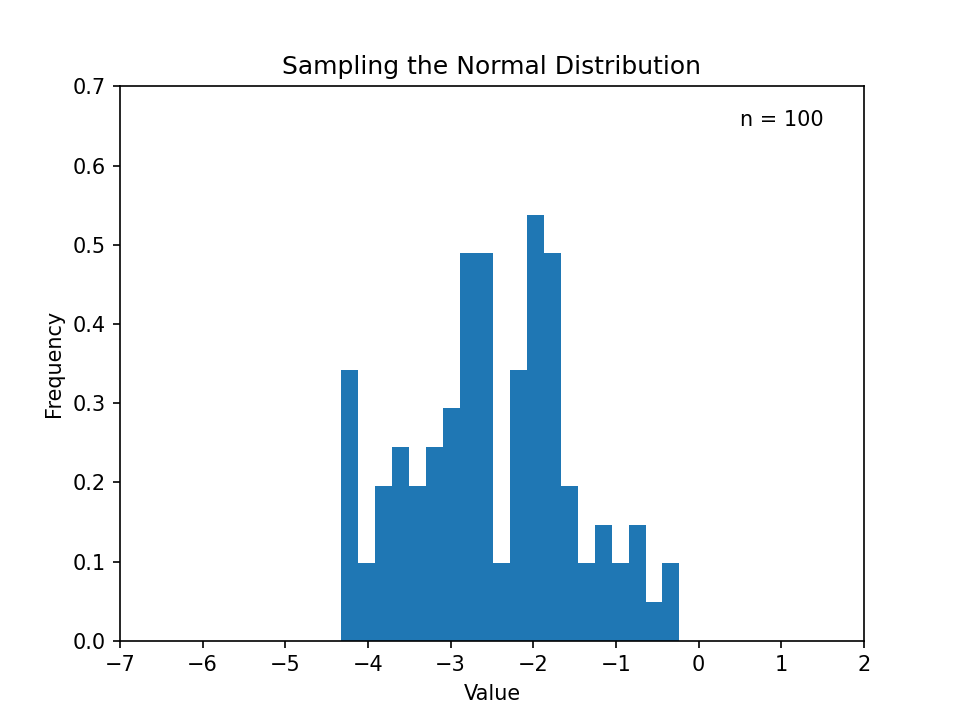

In [33]:
import matplotlib.animation as animation
n = 100
b = 20

# create the function that will do the plotting, where curr is the current frame
def update(curr):
# check if animation is at the last frame, and if so, stop the animation a
#     if curr == n: 
#         a.event_source.stop()
    plt.cla()
    plt.hist(x1[:curr+1], bins=b, density=True)
    plt.axis([-7,2,0,0.7])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr+1), [0.5, 0.65])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, frames=range(n), interval=1, repeat=False)

## <font color=Green> Sampling Animation for Four Different Distributions </font>

<IPython.core.display.Javascript object>


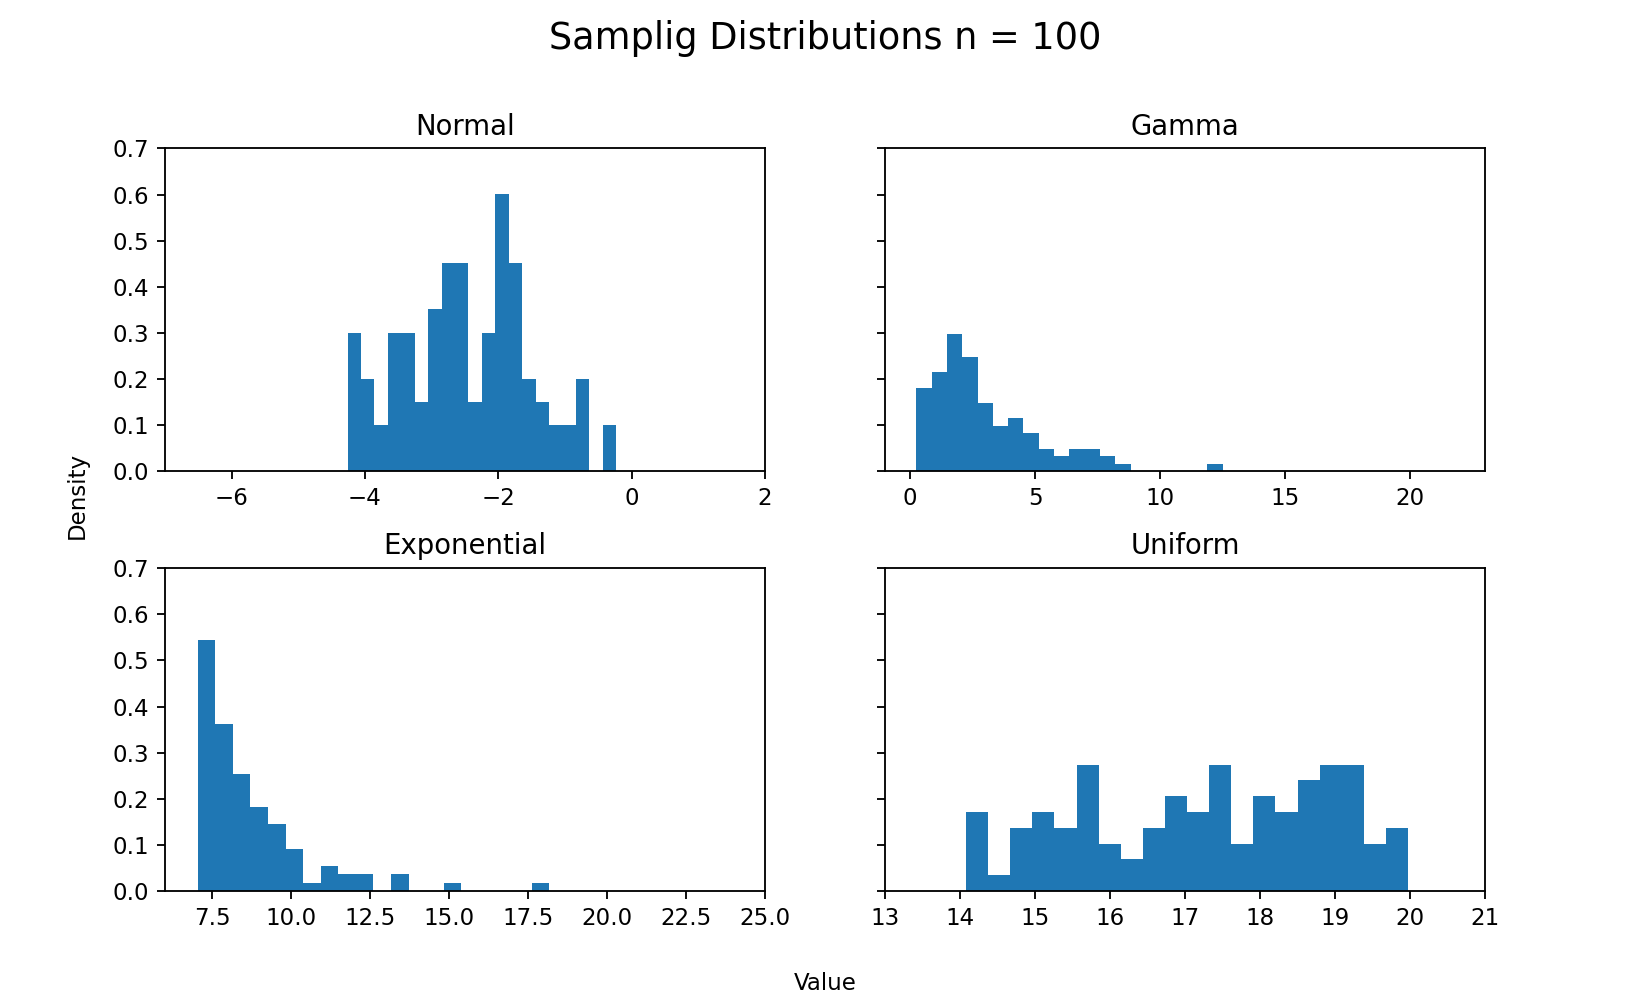

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

import matplotlib.animation as animation

n0 = 100
b = 20

x = [x1, x2, x3, x4]

# Pad some space at the end of x-axis
xmin = list(map(lambda x: np.round(np.min(x)-1, 0), x))
xmax = list(map(lambda x: np.round(np.max(x)+1, 0), x))
myaxis = list(map(lambda z: [*z]+[0,0.7], zip(xmin,xmax)))

coord = [[0.4, 0.8], [0.8, 0.8], [0.4, 0.5], [0.8, 0.5]]

def update_anim(curr):
    # check if animation is at the last frame, and if so, stop the animation a
#     if curr == n:
#         a.event_source.stop()
    ## x1 Normal
    ax1.cla()
    ax1.hist(x1[:curr], bins=b, density=True)
    ax1.axis(myaxis[0])
    ax1.set_title('Normal')
#     ax1.annotate('n = {}'.format(curr), xy=[0.41, 0.85], xycoords='figure fraction')
    
    ## x2 Gamma
    ax2.cla()
    ax2.hist(x2[:curr], bins=b, density=True)
    ax2.axis(myaxis[1])
    ax2.set_title('Gamma')
#     ax2.annotate('n = {}'.format(curr), xy=[0.85, 0.85], xycoords='figure fraction')
    
            
    ## x3 Exponential
    ax3.cla()
    ax3.hist(x3[:curr], bins=b, density=True)
    ax3.axis(myaxis[2])
    ax3.set_title('Exponential')
#     ax3.annotate('n = {}'.format(curr), xy=[0.41,0.43], xycoords='figure fraction')
    
    ## Uniform
    ax4.cla()
    ax4.hist(x4[:curr], bins=b, density=True)
    ax4.axis(myaxis[3])
    ax4.set_title('Uniform')
#     ax4.annotate('n = {}'.format(curr), xy=[0.85,0.43], xycoords='figure fraction')
    
#     plt.annotate('n = {}'.format(curr), xy=[0.95,0.85], xycoords='figure fraction')
    fig.suptitle('Samplig Distributions n = {}\n'.format(curr+1), fontsize=16)
    
# Clear any existing plots
plt.clf()

# Create a 2x2 grid of subplots
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize=(10,6))
fig.text(0.5, 0, 'Value', ha='center')
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical')
# fig.suptitle('Samplig Distributions\n', fontsize=16)
# fig.tight_layout(pad=3.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=0.85, wspace=0.2, hspace=0.3)

a = animation.FuncAnimation(fig, update_anim, frames=range(n0), interval=1, repeat=False, blit=True)


In [165]:
print('x1 min: {:.2f}, max: {:.2f}, range: {:.2f}'. format(x1.min(), x1.max(), x1.max()-x1.min()))
print('x2 min: {:.2f}, max: {:.2f}, range: {:.2f}'. format(x2.min(), x2.max(), x2.max()-x2.min()))
print('x3 min: {:.2f}, max: {:.2f}, range: {:.2f}'. format(x3.min(), x3.max(), x3.max()-x3.min()))
print('x4 min: {:.2f}, max: {:.2f}, range: {:.2f}'. format(x4.min(), x4.max(), x4.max()-x4.min()))

x1 min: -6.35, max: 1.33, range: 7.68
x2 min: 0.04, max: 16.89, range: 16.85
x3 min: 7.00, max: 39.57, range: 32.57
x4 min: 14.00, max: 20.00, range: 6.00


## <font color=grey> Try to Use One Set of Code for all Four Plots but Failed </font>

In [ ]:
n = 300
b = 20

x = [x1, x2, x3, x4]
# axes = [ax1,ax2,ax3,ax4]
dist = ['Normal', 'Gamma', 'Exponential', 'Uniform']

xmin = list(map(lambda x: np.round(np.min(x)-1, 0), x))
xmax = list(map(lambda x: np.round(np.max(x)+1, 0), x))
myaxis = list(map(lambda z: [*z]+[0,0.7], zip(xmin,xmax)))

coord = [[0.4, 0.8], [0.8, 0.8], [0.4, 0.5], [0.8, 0.5]]

for i, ax in enumerate(axs):
    print(i, dist[i], ax, coord[i], myaxis[i])
    
    
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
        
    for i in range(len(axs)):
#     print(i, dist[i], ax, coord[i], myaxis[i])
        ax.cla()
        ax.hist(x[i][:curr], bins=b, normed=True)
        ax.axis(myaxis[i])
        ax.set_title(dist[i])
        ax.annotate('n = {}'.format(curr), xy=coord[i], xycoords='axes points')
    return ax
# Clear any existing plots
plt.clf()

# Create a 2x2 grid of subplots
# fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize=(10,6))
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10,6))
fig.text(0.5, 0, 'Value', ha='center')
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical')
fig.suptitle('Samplig Distributions\n', fontsize=16)

# a = animation.FuncAnimation(fig, update, interval=100)

## <font color=Green> Customize Sampling from Normal Distribution using Widgets </font>

<IPython.core.display.Javascript object>


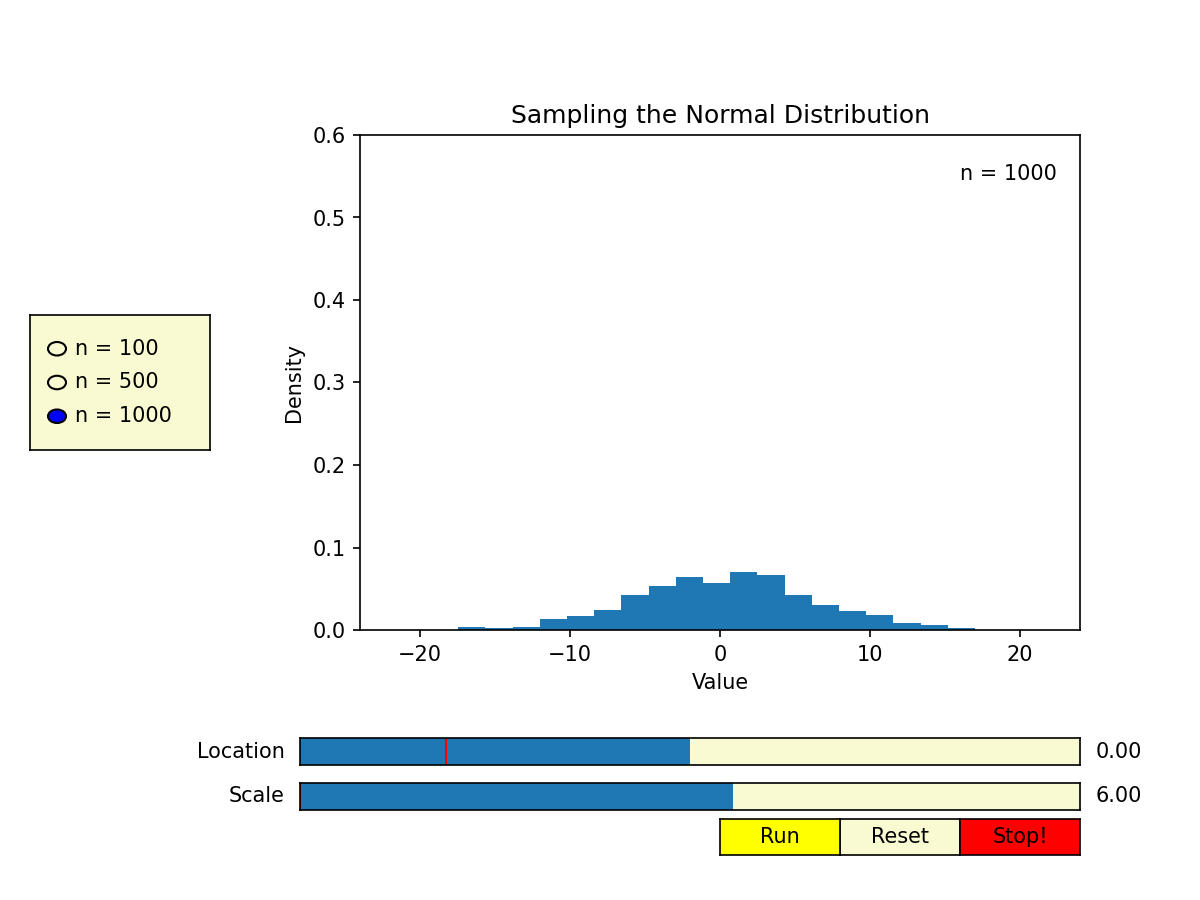

0

In [55]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.animation as animation
import numpy as np

b = 20
loc0=-2.5
scale0=1

# create the function that will do the plotting, where curr is the current frame
def update_anim(curr, data, mean, sd):
# check if animation is at the last frame, and if so, stop the animation a
#     if curr == n: 
#         a.event_source.stop()
    ax.cla()
    ax.hist(data[:curr+1], bins=b, density=True)
    ax.axis([mean-4*sd,mean+4*sd,0,0.6])
    ax.set_title('Sampling the Normal Distribution')
    ax.set_ylabel('Density')
    ax.set_xlabel('Value')
    ax.annotate('n = {}'.format(curr+1), xy=[0.8, 0.8], xycoords = 'figure fraction')

  
fig, ax = plt.subplots(figsize=(8,6))
plt.subplots_adjust(left=0.3, bottom=0.3, right=None, top=0.85, wspace=0.2, hspace=0.3)


#############################################################
axcolor = 'lightgoldenrodyellow'

#create radio button for sample size
ax_n = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(ax_n, ('n = 100', 'n = 500', 'n = 1000'), active=0)


def choose_n(label):
    ndict = {'n = 100': 100, 'n = 500': 500, 'n = 1000': 1000}
    global n
    n = ndict[label]
    
radio.on_clicked(choose_n)


#create sliders for location and scale parameters
ax_loc = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_scale = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

s_loc = Slider(ax_loc, 'Location', -4, 4, valinit=loc0, valstep=0.5)
s_scale = Slider(ax_scale, 'Scale', 1, 10, valinit=scale0, valstep=1)

# def update(val):
# #      a.event_source.stop()
#     global loc
#     loc = s_loc.val


# s_loc.on_changed(update)

#create reset button
resetax = fig.add_axes([0.7, 0.05, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    a.event_source.stop()
    s_loc.reset()
    s_scale.reset()
button.on_clicked(reset)


#create start animation button, set parameters
axnext1 = fig.add_axes([0.6, 0.05, 0.1, 0.04])
bnext1 = Button(axnext1, 'Run', color = 'yellow', hovercolor='grey')

def animate_button(self):
    loc = s_loc.val
    scale = s_scale.val
    x1 = np.random.normal(loc, scale, n)
    
    global a
    a = animation.FuncAnimation(fig, update_anim, frames=range(n)
                                , fargs=(x1, loc, scale)
                                , interval=1, repeat=False, blit=True)
    fig.canvas.draw()
bnext1.on_clicked(animate_button)


#create stop animation action
def stop_animate_button(self):
    a.event_source.stop()
        
axnext2 = fig.add_axes([0.8, 0.05, 0.1, 0.04])
bnext2 = Button(axnext2, 'Stop!', color = 'red', hovercolor='grey')
bnext2.on_clicked(stop_animate_button)

# https://stackoverflow.com/questions/48104082/how-to-combine-a-slider-with-an-animation